# Unlocking Insights: Predicting House Prices with Data Analysis

In [74]:
# Name: Jason Pangestu
# NIM (Binusian ID) : 2602107650
# Importing modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [75]:
# Reading the dataset
df = pd.read_csv("data (1).csv")

In [76]:
# Finding the summary about the number of rows and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
# Making variables that contain every column based on their statistical data types
ord_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
inte_cols = [] # No Columns of Interval Datatypes
rat_cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
# The remaining columns are nominal columns.
nom_cols = [item for item in df.columns if item not in ord_cols and item not in rat_cols]

In [78]:
# Making mapping variables for ordinal columns
# ExterQual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# ExterCond_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# BsmtQual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# BsmtCond_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# BsmtExposure_map = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
# BsmtFinType1_map = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
# BsmtFinType2_map = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
# Heating_map_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# KitchenQual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# FireplaceQu_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# GarageQual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# GarageCond_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# PoolQC_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# Fence_map = {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

# Data Preprocessing

In [79]:
# Checking duplicate rows in the dataset
df.duplicated().sum()

0

In [80]:
# Reformatting each column of the dataset into the correct datatypes
df = df.astype({
    'Id': 'object',
    'MSSubClass': 'object',
    'OverallQual': 'object',
    'OverallCond': 'object',
})

In [81]:
# Removing unused columns
df.drop(columns=['Id'], inplace=True)

In [82]:
# Finding the number of null values in each column which has null values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [83]:
# Removing columns that contain null values more than 60-70% of the number of rows in the dataset
# Imputing missing values on these columns might introduce bias that might not correlate with the reality of the data.

df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], inplace=True)

# Finding the number of null values and the datatype of the dataset columns with the missing values
null_info = df.isna().sum()[df.isna().sum() > 0]
null_info = pd.DataFrame({'Missing Values': null_info, 'Datatype': df.dtypes[null_info.index]})
print(null_info)

              Missing Values Datatype
LotFrontage              259  float64
MasVnrType                 8   object
MasVnrArea                 8  float64
BsmtQual                  37   object
BsmtCond                  37   object
BsmtExposure              38   object
BsmtFinType1              37   object
BsmtFinType2              38   object
Electrical                 1   object
FireplaceQu              690   object
GarageType                81   object
GarageYrBlt               81  float64
GarageFinish              81   object
GarageQual                81   object
GarageCond                81   object


For columns other than LotFrontage and FireplaceQu, I will use central tendency to fill null values.
The central tendency will be mean for normal distributed columns, median for skewed columns, and mode for categorical data.

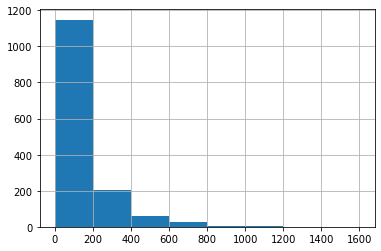

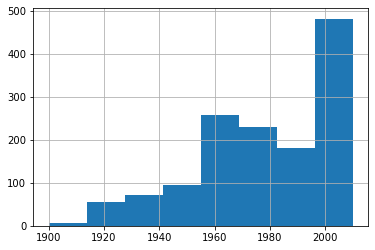

In [84]:
# Viewing the distribution of column MasVnrArea and GarageYrBlt
df['MasVnrArea'].hist(bins=8)
plt.show()
df['GarageYrBlt'].hist(bins=8)
plt.show()

Two of them are skewed. So I will use median as the central tendency to fill the null values.

In [85]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

# Filling all the null values in columns other than LotFrontage and FireplaceQu with their mode
mode_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for column in mode_columns:
    mode_value = df[column].mode()[0]  # Get the first mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)

# Finding the number of null values and the datatype of the dataset columns with the missing values
null_info = df.isna().sum()[df.isna().sum() > 0]
null_info = pd.DataFrame({'Missing Values': null_info, 'Datatype': df.dtypes[null_info.index]})
print(null_info)

             Missing Values Datatype
LotFrontage             259  float64
FireplaceQu             690   object


I will use machine learning to fill the null values in the column "LotFrontage" with float datatype and "FireplaceQu" with object datatype. There are many popular and useful machine learning models which we can use, but for this case I will just use KNN Regressor and KNN Classifier.

I will fill the null values of column "FireplaceQu" first since it has the higher number of null values.

<AxesSubplot:>

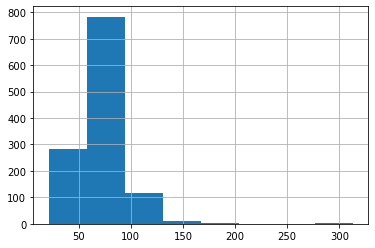

In [86]:
# Finding the distribution of the column LotFrontage
# We need this to fill the null values in the column with a central tendency before training a model to fill the column "FireplaceQu"
df['LotFrontage'].hist(bins=8)

I will use median as the central tendency.

In [87]:
# Updating the column type list variables
ord_cols = [i for i in ord_cols if i not in ['PoolQC', 'Fence']]
nom_cols = [i for i in nom_cols if i not in ['Id', 'Alley', 'MiscFeature']]

In [88]:
# Making a dictionary that contain the ordered ordinal values of every ordinal column (For the remaining columns only)
# This is used to train a model that fill FireplaceQu column null values
ords = {'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
        'BsmtFinType1': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        'BsmtFinType2': ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'GarageCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
       }

In [89]:
# Splitting the dataset into two datasets (one with the null values in the FireplaceQu column and the other without the null values in the FireplaceQu column)
df_missing = df[df['FireplaceQu'].isna()]
df_nonmissing = df.dropna(subset=['FireplaceQu'])

# Filling the column with the missing value (LotFrontage) with the median
df_missing['LotFrontage'].fillna(df_missing['LotFrontage'].median(), inplace=True)
df_nonmissing['LotFrontage'].fillna(df_missing['LotFrontage'].median(), inplace=True)

# Splitting the dataset into rows of feature and target columns
x_train = df_nonmissing.loc[:, [p for p in df.columns if p not in ['FireplaceQu']]]
y_train = df_nonmissing['FireplaceQu']

x_test = df_missing.loc[:, [p for p in df.columns if p not in ['FireplaceQu']]]
y_test = df_missing['FireplaceQu']

# Creating a function that can detect outliers in column or multiple columns by using the Z-score method
def detect_outliers(column):
    z_scores = np.abs((column - column.mean()) / column.std())
    return z_scores > 3

# Applying the function to only the numeric columns of the dataset before counting the number of outliers of each column using .sum()
outliers_count = x_train.loc[:, rat_cols].apply(detect_outliers).sum()
print(outliers_count)

LotFrontage       9
LotArea          10
YearBuilt         5
YearRemodAdd      0
MasVnrArea       13
BsmtFinSF1        4
BsmtFinSF2       25
BsmtUnfSF         6
TotalBsmtSF       6
1stFlrSF          5
2ndFlrSF          1
LowQualFinSF      8
GrLivArea         8
BsmtFullBath      0
BsmtHalfBath     49
FullBath          4
HalfBath          0
BedroomAbvGr      3
KitchenAbvGr     11
TotRmsAbvGrd      8
Fireplaces        5
GarageYrBlt       2
GarageCars       11
GarageArea        5
WoodDeckSF        9
OpenPorchSF      11
EnclosedPorch    30
3SsnPorch        15
ScreenPorch      19
PoolArea          7
MiscVal           8
MoSold            0
YrSold            0
SalePrice        10
dtype: int64


C:\Users\Jason\AppData\Local\Temp\ipykernel_20220\3690108424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['LotFrontage'].fillna(df_missing['LotFrontage'].median(), inplace=True)
C:\Users\Jason\AppData\Local\Temp\ipykernel_20220\3690108424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonmissing['LotFrontage'].fillna(df_missing['LotFrontage'].median(), inplace=True)


In [90]:
# Deleting any row that have outliers using masking
outliers_mask = x_train[rat_cols].apply(detect_outliers)
x_train = x_train[~outliers_mask.any(axis=1)]
y_train = y_train[~outliers_mask.any(axis=1)]

# Encoding nominal columns
# Creating a variable called OHE which contains the process of OneHotEncoder from sklearn
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Creating temp variable which contains the data of the transformed nominal columns data from x
temp = OHE.fit_transform(x_train[nom_cols])
# Creating temp2 variable which contains the dataframe version of temp
temp2 = pd.DataFrame(temp, columns=OHE.get_feature_names_out(nom_cols))
# Resetting the index to default 0 to n-1 from x to avoid potential wrong indexes due to previous operations on x (Just in Case)
x_train = x_train.reset_index(drop=True)
# Combining the x without the nominal columns with temp2 which contains the encoded nominal columns data
x_train = pd.concat([x_train.drop(nom_cols, axis=1), temp2], axis=1)

# The same things also happen to x_test but we only transform using OHE since we already fitted the OHE process using training data
temp = OHE.transform(x_test[nom_cols])
temp2 = pd.DataFrame(temp, columns=OHE.get_feature_names_out(nom_cols))
x_test = x_test.reset_index(drop=True)
x_test = pd.concat([x_test.drop(nom_cols, axis=1), temp2], axis=1)

# Making a for loop that transform every ordinal column values in x_train and x_test variables using OrdinalEncoder from sklearn using the previously created ords variable
for i in ords:
    OE = OrdinalEncoder(categories=[ords[i]], handle_unknown='use_encoded_value', unknown_value=-1).fit(x_train[[i]])
    x_train[i] = OE.transform(x_train[[i]])
    x_test[i] = OE.transform(x_test[[i]])

# Scaling all columns using MinMaxScaler()
MMS = MinMaxScaler()
columns = x_train.columns
x_train = pd.DataFrame(MMS.fit_transform(x_train), columns=columns)
x_test = pd.DataFrame(MMS.fit_transform(x_test), columns=columns)

In [91]:
# Loading the KNN Classifier model
KNN_C = KNeighborsClassifier()
KNN_C.fit(x_train, y_train)

# Predicting the missing values of dataset rows with null values in column "FirePlaceQU"
preds = KNN_C.predict(x_test)

# Imputing the predicted values into the original dataset
df.loc[df['FireplaceQu'].isna(), 'FireplaceQu'] = preds

Now, we will also use machine learning to fill null values in column "LotFrontage".

In [92]:
# Updating the column type list variables
rat_cols = [i for i in rat_cols if i not in ['LotFrontage']]
# Updating the dictionary that contain the ordered ordinal values of every ordinal column
ords['FireplaceQu'] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

In [93]:
# Splitting the dataset into two datasets (one with the null values in the LotFrontage column and the other without the null values in the LotFrontage column)
df_missing = df[df['LotFrontage'].isna()]
df_nonmissing = df.dropna(subset=['LotFrontage'])

# Splitting the dataset without the null values into rows of feature and target columns
x_train = df_nonmissing.loc[:, [p for p in df.columns if p not in ['LotFrontage']]]
y_train = df_nonmissing['LotFrontage']

x_test = df_missing.loc[:, [p for p in df.columns if p not in ['LotFrontage']]]
y_test = df_missing['LotFrontage']

# Applying detect_outliers function to only the numeric columns of the dataset before counting the number of outliers of each column using .sum()
outliers_count = x_train.loc[:, rat_cols].apply(detect_outliers).sum()
print(outliers_count)

LotArea          12
YearBuilt         2
YearRemodAdd      0
MasVnrArea       26
BsmtFinSF1        6
BsmtFinSF2       38
BsmtUnfSF         6
TotalBsmtSF       6
1stFlrSF          8
2ndFlrSF          4
LowQualFinSF     18
GrLivArea        14
BsmtFullBath     14
BsmtHalfBath     63
FullBath          0
HalfBath         10
BedroomAbvGr     11
KitchenAbvGr     62
TotRmsAbvGrd     11
Fireplaces        4
GarageYrBlt       1
GarageCars        0
GarageArea        5
WoodDeckSF       14
OpenPorchSF      21
EnclosedPorch    41
3SsnPorch        17
ScreenPorch      43
PoolArea          6
MiscVal          16
MoSold            0
YrSold            0
SalePrice        17
dtype: int64


In [94]:
# Deleting any row that have outliers using masking
outliers_mask = x_train[rat_cols].apply(detect_outliers)
x_train = x_train[~outliers_mask.any(axis=1)]
y_train = y_train[~outliers_mask.any(axis=1)]

# Encoding nominal columns using One Hot Encoder for training and testing dataset
temp = OHE.transform(x_train[nom_cols])
temp2 = pd.DataFrame(temp, columns=OHE.get_feature_names_out(nom_cols))
x_train = x_train.reset_index(drop=True)
x_train = pd.concat([x_train.drop(nom_cols, axis=1), temp2], axis=1)

temp = OHE.transform(x_test[nom_cols])
temp2 = pd.DataFrame(temp, columns=OHE.get_feature_names_out(nom_cols))
x_test = x_test.reset_index(drop=True)
x_test = pd.concat([x_test.drop(nom_cols, axis=1), temp2], axis=1)

# Making a for loop that transform every ordinal column values in x_train and x_test variables using OrdinalEncoder from sklearn using the previously created ords variable
for i in ords:
    OE = OrdinalEncoder(categories=[ords[i]], handle_unknown='use_encoded_value', unknown_value=-1).fit(x_train[[i]])
    x_train[i] = OE.transform(x_train[[i]])
    x_test[i] = OE.transform(x_test[[i]])

# Scaling all columns using MinMaxScaler()
MMS = MinMaxScaler()
columns = x_train.columns
x_train = pd.DataFrame(MMS.fit_transform(x_train), columns=columns)
x_test = pd.DataFrame(MMS.fit_transform(x_test), columns=columns)

In [95]:
# Loading the KNN Regressor model since LotFrontage column is a ratio datatype column
KNN_R = KNeighborsRegressor()
KNN_R.fit(x_train, y_train)

# Predicting the missing values of dataset rows with null values in column "LotFrontage"
preds = KNN_R.predict(x_test)

# Imputing the predicted values into the original dataset
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = preds

Text(0, 0.5, 'Total Sales in USD')

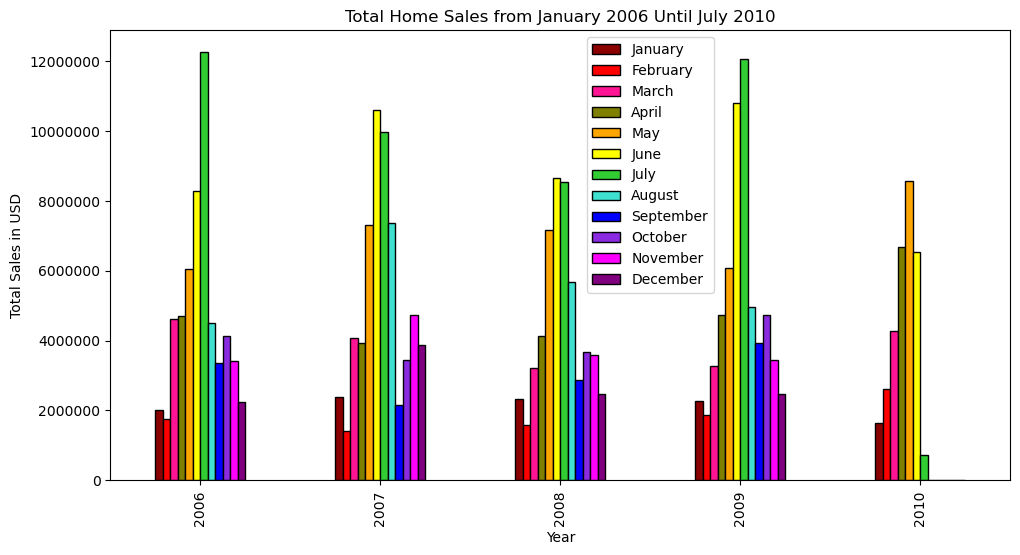

In [104]:
figure = plt.figure(figsize=(10, 5), dpi=100)
axes_1 = figure.add_axes([0.1, 0.1, 0.9, 0.9])
plt.ticklabel_format(style='plain', axis='y')

df.groupby(["YrSold", "MoSold"])["SalePrice"].sum().unstack().plot(kind='bar', ax=axes_1, edgecolor='k', color=['darkred', 'red', 'deeppink', 'olive', 'orange', 'yellow', 'limegreen', 'turquoise', 'blue', 'blueviolet', 'magenta', 'purple'])
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], loc='best', bbox_to_anchor=(0.178, 0.5, 0.5, 0.5))
plt.title('Total Home Sales from January 2006 Until July 2010')
plt.xlabel('Year')
plt.ylabel('Total Sales in USD')

In [105]:
new_data = df.groupby("MSSubClass")["SalePrice"].sum().sort_values()[::-1]
(((new_data.loc[60] + new_data.loc[20])/new_data.sum())*100).round(2)

64.75

Text(0, 0.5, 'Neighborhood')

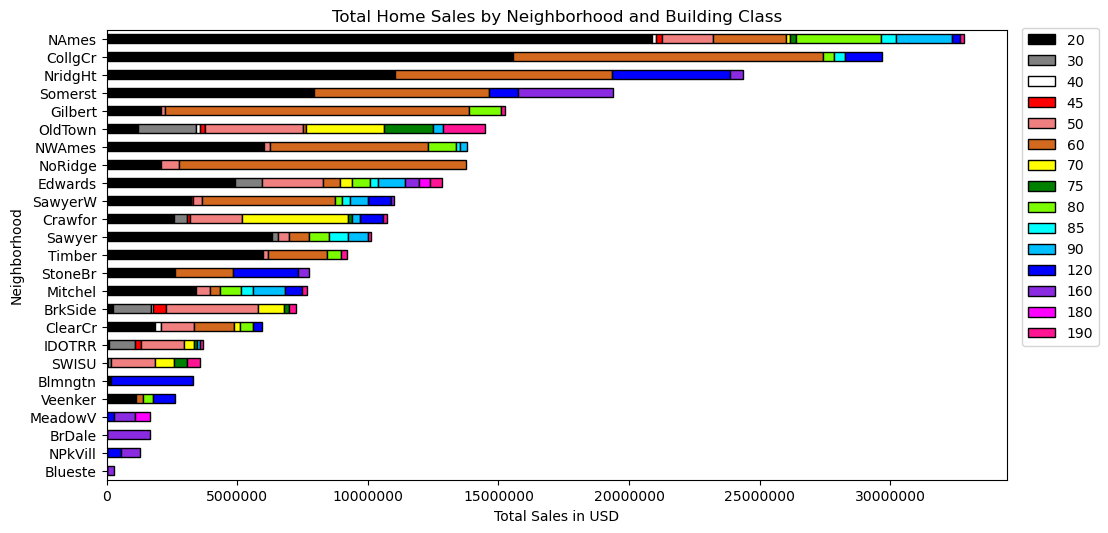

In [106]:
figure = plt.figure(figsize=(10, 5), dpi=100)
axes_1 = figure.add_axes([0.1, 0.1, 0.9, 0.9])

table = df.groupby(["Neighborhood", "MSSubClass"])["SalePrice"].sum().unstack().fillna(0)

table['total'] = table.sum(axis=1)

table = table.sort_values(by='total')

table = table.drop(['total'], axis=1)

table.plot(kind='barh', edgecolor='k', stacked=True, color=['black', 'grey', 'white', 'red', 'lightcoral', 'chocolate', 'yellow', 'green', 'lawngreen', 'aqua', 'deepskyblue', 'blue', 'blueviolet', 'magenta', 'deeppink'], ax=axes_1)
plt.legend(loc='best', bbox_to_anchor=(0.61, 0.52, 0.5, 0.5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total Home Sales by Neighborhood and Building Class')
plt.xlabel('Total Sales in USD')
plt.ylabel('Neighborhood')


In [107]:
(df[df['MSSubClass'] == 60]['SalePrice'].sum() + df[df['MSSubClass'] == 20]['SalePrice'].sum())/df['SalePrice'].sum()

0.6474668684366953

Text(0, 0.5, 'Roof Type')

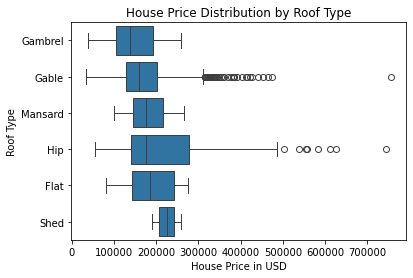

In [109]:
table = df.groupby("RoofStyle")["SalePrice"].median().sort_values()
sns.boxplot(data=df, x='SalePrice', y='RoofStyle', order=table.index)
plt.title('House Price Distribution by Roof Type')
plt.xlabel('House Price in USD')
plt.ylabel('Roof Type')

Text(0, 0.5, 'Paved Driveway')

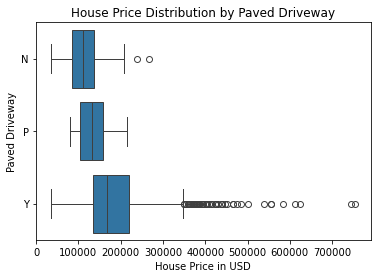

In [110]:
table = df.groupby("PavedDrive")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='PavedDrive', order=table.index)
plt.title('House Price Distribution by Paved Driveway')
plt.xlabel('House Price in USD')
plt.ylabel('Paved Driveway')

Text(0, 0.5, 'Garage Type')

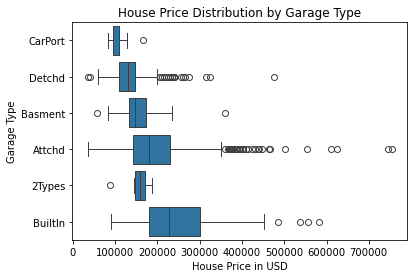

In [111]:
table = df.groupby("GarageType")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='GarageType', order=table.index)
plt.title('House Price Distribution by Garage Type')
plt.xlabel('House Price in USD')
plt.ylabel('Garage Type')

Text(0, 0.5, 'Heater')

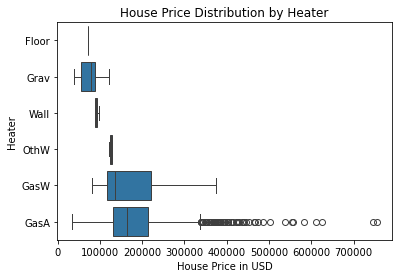

In [112]:
thetype = "Heating"
table = df.groupby(thetype)["SalePrice"].median().sort_values()
sns.boxplot(data=df, x='SalePrice', y=thetype, order=table.index)
plt.title('House Price Distribution by Heater')
plt.xlabel('House Price in USD')
plt.ylabel('Heater')

Text(0, 0.5, 'Electricity')

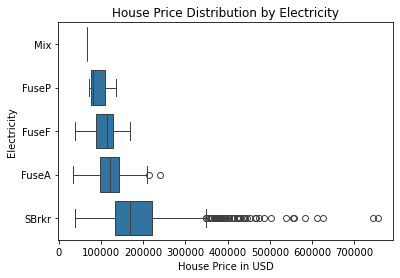

In [113]:
table = df.groupby("Electrical")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='Electrical', order=table.index)
plt.title('House Price Distribution by Electricity')
plt.xlabel('House Price in USD')
plt.ylabel('Electricity')

Text(0, 0.5, 'Sale Type')

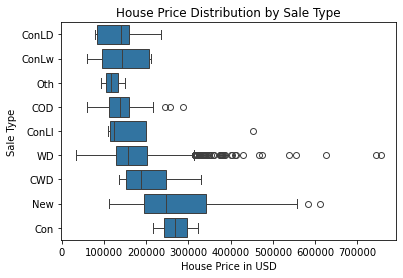

In [118]:
table = df.groupby("SaleType")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='SaleType', order=table.index)
plt.title('House Price Distribution by Sale Type')
plt.xlabel('House Price in USD')
plt.ylabel('Sale Type')

In [115]:
print(df[df['RoofStyle'] == 'Gambrel']['SalePrice'].median())
print(df[df['RoofStyle'] == 'Shed']['SalePrice'].median())
print(df[df['PavedDrive'] == 'Y']['SalePrice'].median())
print(df[df['GarageType'] == 'CarPort']['SalePrice'].median())
print(df[df['GarageType'] == 'BuiltIn']['SalePrice'].median())
print(df[df['Heating'] == 'GasA']['SalePrice'].median())
print(df[df['Electrical'] == 'SBrkr']['SalePrice'].median())

139000.0
225000.0
168500.0
108000.0
227500.0
164500.0
170000.0


Text(0, 0.5, 'Number of Fireplaces')

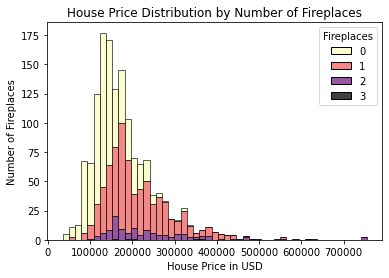

In [119]:
sns.histplot(data=df, x='SalePrice', hue='Fireplaces', multiple='stack', palette=sns.color_palette("magma_r", as_cmap=True))
plt.title('House Price Distribution by Number of Fireplaces')
plt.xlabel('House Price in USD')
plt.ylabel('Number of Fireplaces')

Text(0, 0.5, 'Garage Cars')

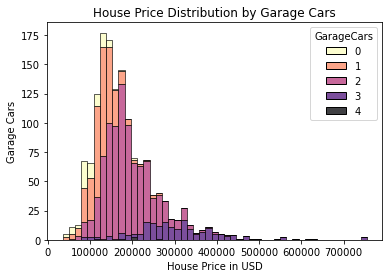

In [120]:
sns.histplot(data=df, x='SalePrice', hue='GarageCars', multiple='stack', palette=sns.color_palette("magma_r", as_cmap=True))
plt.title('House Price Distribution by Garage Cars')
plt.xlabel('House Price in USD')
plt.ylabel('Garage Cars')

Text(0.5, 1.0, 'Correlation of House Price with Other Variables in The Dataset')

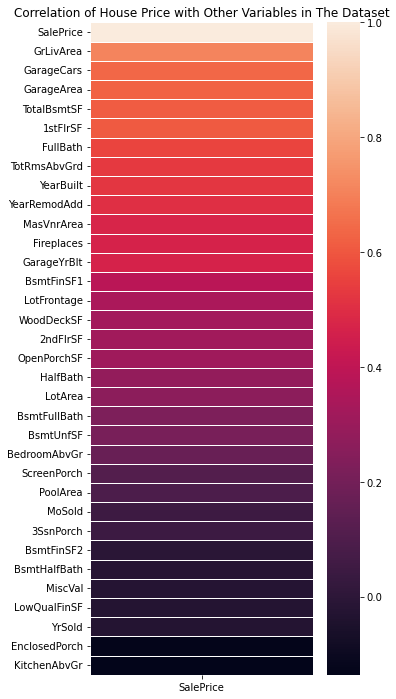

In [121]:
df2 = df.corr()[['SalePrice']].sort_values(by='SalePrice')[::-1]
f, ax = plt.subplots(figsize=(5, 12))
sns.heatmap(df2, linewidths=.5, ax=ax)
plt.title('Correlation of House Price with Other Variables in The Dataset')